([], [])

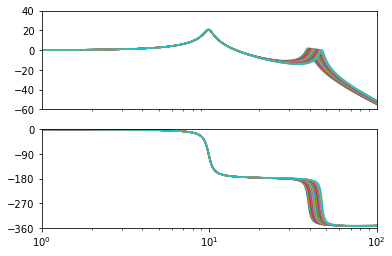

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from control.matlab import *


m1 = 0.8
m2 = 0.2
k1 = 100

c1 = 1
c2 = 0.3
Ks = 100

M = np.matrix([[m1, 0],[0, m2]])
C= np.matrix([[c1+c2, -c2],[-c2, c2]])
F = np.matrix([[Ks],[0]])

iM = np.linalg.inv(M)
Bp = np.concatenate([np.zeros((2,1)), iM*F])
Cp = [0,1,0,0]
Dp = 0


plt.figure(1)
plt.subplot(2,1,1)
plt.ylim(-60, 40)
plt.yticks(np.arange(-60, 41, 20))
plt.xlim(1e0, 1e2)
plt.subplot(2,1,2)
plt.ylim(-360, 0)
plt.yticks(np.arange(-360, 1, 90))
plt.xlim(1e0, 1e2)
fig1, fig2 = plt.gcf().axes # subplotのハンドラを取得

delta = np.arange(-1, 1, 0.1)
for i in range(len(delta)):
    k2 = 300+300*0.2*delta[i]
    K = np.matrix([[k1+k2, -k2],[-k2, k2]])
    Ap = np.concatenate([np.concatenate([np.zeros((2,2,)), np.eye(2)], axis = 1), np.concatenate([-iM*K, -iM*C], axis = 1)])
    P = ss(Ap, Bp, Cp, Dp)
    mag, phase, om = bode(P, plot = False)
    plt.sca(fig1)
    plt.semilogx(om, 20*np.log10(mag))
    plt.sca(fig2)
    plt.semilogx(om, phase*180/np.pi)
plt.sca(fig1)
plt.xticks([])


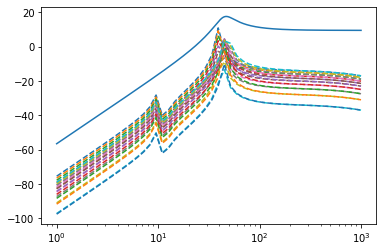

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from control.matlab import *

#%% 乗法的摂動の見積もり
s = tf('s');
k2 = 300;
K = np.matrix([ [ k1+k2, -k2 ],
                [ -k2,    k2 ] ]);
Ap = np.concatenate([
     np.concatenate([np.zeros((2,2)),  np.eye(2)], axis=1),
     np.concatenate([          -iM*K,     -iM*C ], axis=1) ]);
# %% ノミナル制御対象の定義
P_nominal = ss( Ap, Bp, Cp, Dp );
Pn = ss2tf(P_nominal);

plt.figure(2)
delta_ = np.arange(-1, 1.01 , 0.1)
delta = np.delete(delta_,10)

for i in range(len(delta)):
    k2 = 300+300*0.2*delta[i];
    K = np.matrix([ [ k1+k2, -k2 ],
                    [ -k2,    k2 ] ]);
    Ap = np.concatenate([
         np.concatenate([np.zeros((2,2)),  np.eye(2)], axis=1),
         np.concatenate([          -iM*K,     -iM*C ], axis=1) ]);
    # %% 制御対象の定義
    P = ss(Ap,Bp,Cp,Dp);
    P_g = ss2tf(P);
    Dm_g = (P_g - Pn)/Pn; #% 乗法的摂動の計算
    #%% ゲイン線図のプロット
    #bodemag(Dm_g,'--',Wm,'r-',w)
    mag, phase, om = bode( Dm_g, logspace(0,3), plot=False );
    plt.semilogx( om, 20*np.log10(mag), '--' );

#%% 重み Wm の定義
Wm = 3*s**2/(s**2+18*s+45**2);
mag2, phase2, om2 = bode( Wm, plot=False );
plt.semilogx( om2, 20*np.log10(mag2) );

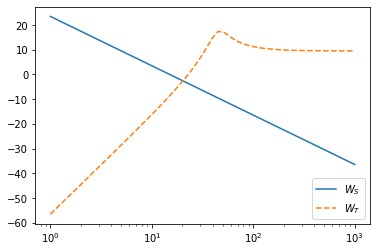

In [8]:
import control
from control.matlab import *

#%% defgp.m
#%% 重み関数の定義
s = tf('s');
Ws = 15/(s + 1.5e-2); #% Ws
Wt = Wm;              #% Wt
Weps = 5e-4;          #% Weps

plt.figure(3)
#bodemag(Ws,Wt,'--',w);
mag, phase, om  = bode(Ws, logspace(0,3), plot=False);
mag2,phase2,om2 = bode(Wt, logspace(0,3), plot=False);
plt.semilogx(om,  20*np.log10(mag), label='$W_S$');
plt.semilogx(om2, 20*np.log10(mag2), '--', label='$W_T$');
#legend('Ws','Wt',4);
plt.legend()

In [9]:
num = [[Ws.num[0][0],    [0], (-Ws).num[0][0]], 
       [         [0],    [0],    Wt.num[0][0]],
       [Pn.num[0][0], [Weps], (-Pn).num[0][0]]]
den = [[Ws.den[0][0],    [1], (-Ws).den[0][0]], 
       [         [1],    [1],    Wt.den[0][0]],
       [Pn.den[0][0],    [1], (-Pn).den[0][0]]]
G_ = tf(num, den)
G = tf2ss(G_)

#%% H-inf制御器の計算（実行4.1）
#[K,clp,gamma_min,hinf_info] = hinfsyn(G,1,1,'display','on');
K, CL, gam, rcond = control.hinfsyn(G,1,1)
print( gam )

plt.figure(4)
mag1, phase1, om1 = bode( P_nominal, plot=False );
plt.semilogx( om1, 20*np.log10(mag1), '--', label='$P_{nominal}$' );
mag2, phase2, om2 = bode( K, plot=False );
plt.semilogx( om2, 20*np.log10(mag2), label='$K$' );
plt.ylim(-60, 60);
plt.xlim(1e0, 1e2);
plt.legend()

TypeError: No support for MIMO without slycot

In [10]:
import control
print(control.slycot_check())

False
